<a href="https://colab.research.google.com/github/kcarroth-dev/KarltonCarrothers_ML/blob/main/ECGR4105_Hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1



In [110]:
# Torch Libraries
import torch
import torch.optim as optim

# Other Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [111]:
def nonlinear_model(t_u, w2, w1, b):
    """
   Non-Linear Model

    Parameters:
    t_u : Input Data
    w2 : Theta 2
    w1 : Theta 1
    b : Bias term

    Returns:
    t_c : Nonlinear Model Output
    """
    t_c = w2*t_u**2 + w1*t_u + b
    return t_c

In [112]:
def loss(t_p, t_c):
    """
    NonLinear Loss Function

    Parameters:
    t_p : Predicted values
    t_c : Calculated values

    Returns:
    square_diff.mean() : The average value of the loss calculated as the difference between the predicted and calculated values squared.
    """
    square_diff = (t_p - t_c)**2
    return square_diff.mean()

In [113]:
def nonlinear_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
    """
    Training for the model.

    Parameters:
    epochs : Training Iterations
    optimizer : Optimizer used to train the model
    params : Array storing the theta values
    t_u_t : The input training set
    t_u_v : The input values validation set
    t_c_t : The output training set
    t_c_v : The output validation set

    Returns:
    params : The calculated theta values
    """
    for epoch in range(1, epochs+1):
      tp_t = nonlinear_model(t_u_train, *params)
      train_loss = loss(tp_t, t_c_train)

      tp_v = nonlinear_model(t_u_valid, *params)
      valid_loss = loss(tp_v, t_c_valid)

      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

    return params

In [114]:

def linear_model(t_u, w, b):
  return w*t_u + b

In [115]:
def linear_training1(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    tp_t = linear_model(t_u_train, *params)
    train_loss = loss(tp_t, t_c_train)

    t_p_valid = linear_model(t_u_valid, *params)
    valid_loss = loss(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params

In [116]:
# X values
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# Y values
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)

In [117]:
# Pre-processing and normalizing data
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

index_new = torch.randperm(n_samples)

train_indices = index_new[:-n_val]
val_indices = index_new[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [118]:
# Create models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Create SGD Optimizers for different learning rates
print('SGD Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.SGD([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

# Create Adam Optimizers for different learning rates
print('Adam Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

SGD Optimizers:

Learning rate of 0.1

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan

Learning rate of 0.01

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500

Epochs: 500, 	Training Loss: 6.107077, 	Validation Loss: 11.244560

Epochs: 1000, 	Training Loss: 2.540347, 	Validation Loss: 9.516943

Epochs: 1500, 	Training Loss: 2.068426, 	Validation Loss: 8.992671

Epochs: 2000, 	Training Loss: 2.005983, 	Validation Loss: 8.815727

Epochs: 2500, 	Training Loss: 1.997721, 	Validation Loss: 8.753201

Epochs: 3000, 	Training Loss: 1.996627, 	Validation Loss: 8.730684

Epochs: 3500, 	Training Loss: 1.996482, 	Validation Loss: 8.722547

Epochs: 4000, 	Training Loss: 1.996463, 	Validation Loss: 8.719565

Epochs: 4500, 	Training Loss: 1.996461, 	Validation Loss: 8.718517

Epochs: 5000, 	Training Loss: 1.996461, 	Validation Loss: 8.718115

Epochs: 500, 	Training Loss: 10.843823, 	Validation Loss: 10.826031

Epochs: 1000, 	Training Loss: 8.681072, 	Validation Loss: 8.825797

Epochs: 1500, 	Training Loss: 7.195411, 	Validation Loss: 7.328044

Epochs: 2000, 	Training Loss: 6.174154, 	Validation Loss: 6.196690

Epochs: 2500, 	Training Loss: 5.471424, 	Valida

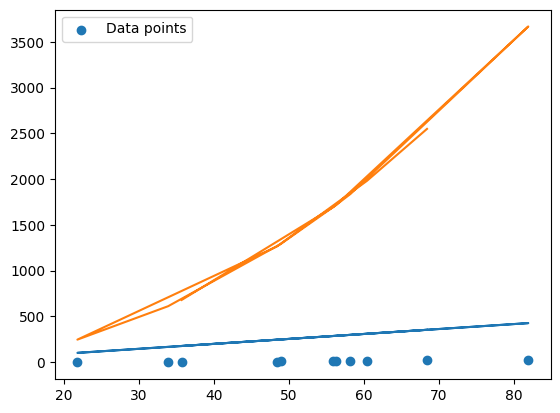

In [142]:
# Plot Nonlinear vs Linear Models
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

#Best Nonlinear model lr = 0.0001
linear_optimizer = optim.SGD([linear_params], lr = 0.01)
nonlinear_optimizer = optim.SGD([nonlinear_params], lr = 0.0001)

linear = linear_training1(5000, linear_optimizer, linear_params, train_t_un, val_t_un, train_t_c, val_t_c)
nonlinear = nonlinear_training(5000, nonlinear_optimizer, nonlinear_params, train_t_un, val_t_un, train_t_c, val_t_c)

t_p_lin = linear_model(t_u, *linear).detach().numpy()
t_p_non = nonlinear_model(t_u, *nonlinear).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin)
plt.plot(t_u, t_p_non)

plt.legend()
plt.show()

Problem 2

In [120]:
# Import csv data from my GitHub repo
housing_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/Housing.csv'

# Create dataframes for each url
dfh = pd.read_csv(housing_url)

In [121]:
def lin_model(t_x, w5, w4, w3, w2, w1, b):
  """
 Making linear model with 6 parameters

  Parameters:
  t_x : The input data
  thetas : Values for the thetas
  """
  return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [122]:
def lin_train(epochs, optimizer, params, t_x_train, t_x_valid, t_y_train, t_y_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_x_train, *params)
    train_loss = loss(t_p_train, t_y_train)

    t_p_valid = lin_model(t_x_valid, *params)
    valid_loss = loss(t_p_valid, t_y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params, train_losses, valid_losses

In [123]:
from sklearn.preprocessing import StandardScaler

# Get data from list
varlist = ["area", "bedrooms", "bathrooms", "stories", "parking"]

x = dfh[varlist].values
y = dfh['price'].values

# Standardize input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Standardize output variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

t_x = torch.tensor(x_scaled)
t_y = torch.tensor(y_scaled)

# Creating training and validation sets
n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

new_index = torch.randperm(n_samples)
train_index = new_index[:-n_val]
val_index = new_index[-n_val:]

train_t_x = t_x[train_index]
train_t_y = t_y[train_index]

val_t_x = t_x[val_index]
val_t_y = t_y[val_index]

In [124]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)
print('Learning rate of 0.1\n')
model1, train_loss1, valid_loss1 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss1 = np.array([item.detach().item() for item in train_loss1])
sgd_valid_loss1 = np.array([item.detach().item() for item in valid_loss1])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.01)
print('Learning rate of 0.01\n')
model2, train_loss2, valid_loss2 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss2 = np.array([item.detach().item() for item in train_loss2])
sgd_valid_loss2 = np.array([item.detach().item() for item in valid_loss2])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.001)
print('Learning rate of 0.001\n')
model3, train_loss3, valid_loss3 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss3 = np.array([item.detach().item() for item in train_loss3])
sgd_valid_loss3 = np.array([item.detach().item() for item in valid_loss3])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model4, train_loss4, valid_loss4 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss4 = np.array([item.detach().item() for item in train_loss4])
sgd_valid_loss4 = np.array([item.detach().item() for item in valid_loss4])

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 1000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 1500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 2000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 2500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 3000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 3500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 4000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 4500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 5000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.403369, 	Validation Loss: 0.581344

Epochs: 1000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 1500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 2000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epoch

In [125]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.1)
print('Learning rate of 0.1\n')
model1, train_loss1, valid_loss1 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss1 = np.array([item.detach().item() for item in train_loss1])
adam_valid_loss1 = np.array([item.detach().item() for item in valid_loss1])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.01)
print('Learning rate of 0.01\n')
model2, train_loss2, valid_loss2 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss2 = np.array([item.detach().item() for item in train_loss2])
adam_valid_loss2 = np.array([item.detach().item() for item in valid_loss2])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.001)
print('Learning rate of 0.001\n')
model3, train_loss3, valid_loss3 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss3 = np.array([item.detach().item() for item in train_loss3])
adam_valid_loss3 = np.array([item.detach().item() for item in valid_loss3])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model4, train_loss4, valid_loss4 = lin_train(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss4 = np.array([item.detach().item() for item in train_loss4])
adam_valid_loss4 = np.array([item.detach().item() for item in valid_loss4])

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 1000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 1500, 	Training Loss: 0.403369, 	Validation Loss: 0.581365

Epochs: 2000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 2500, 	Training Loss: 0.403369, 	Validation Loss: 0.581395

Epochs: 3000, 	Training Loss: 0.403369, 	Validation Loss: 0.581367

Epochs: 3500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 4000, 	Training Loss: 0.403370, 	Validation Loss: 0.581275

Epochs: 4500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 5000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.403369, 	Validation Loss: 0.581405

Epochs: 1000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 1500, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epochs: 2000, 	Training Loss: 0.403369, 	Validation Loss: 0.581368

Epoch

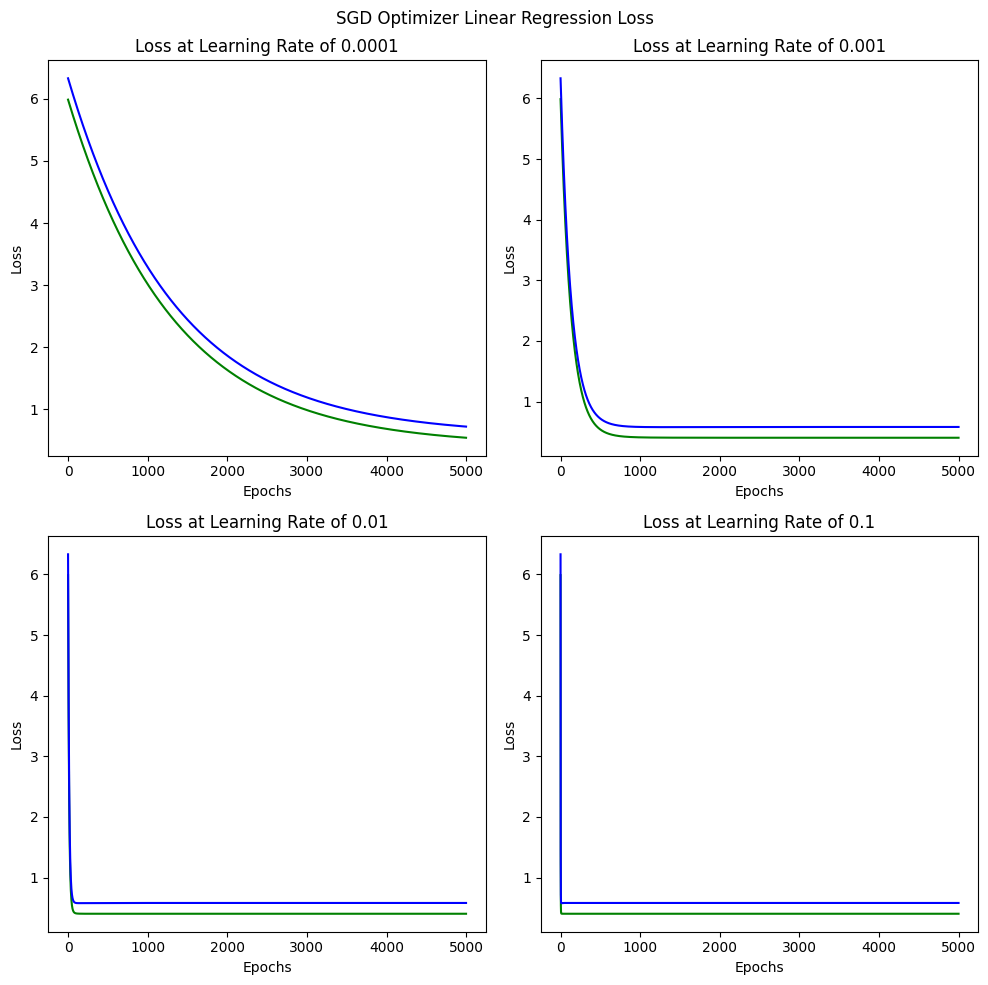

In [126]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(sgd_train_loss4, color='green')
plt.plot(sgd_valid_loss4, color='blue')
plt.title('Loss at Learning Rate of 0.0001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(sgd_train_loss3, color='green')
plt.plot(sgd_valid_loss3, color='blue')
plt.title('Loss at Learning Rate of 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(sgd_train_loss2, color='green')
plt.plot(sgd_valid_loss2, color='blue')
plt.title('Loss at Learning Rate of 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(sgd_train_loss1, color='green')
plt.plot(sgd_valid_loss1, color='blue')
plt.title('Loss at Learning Rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

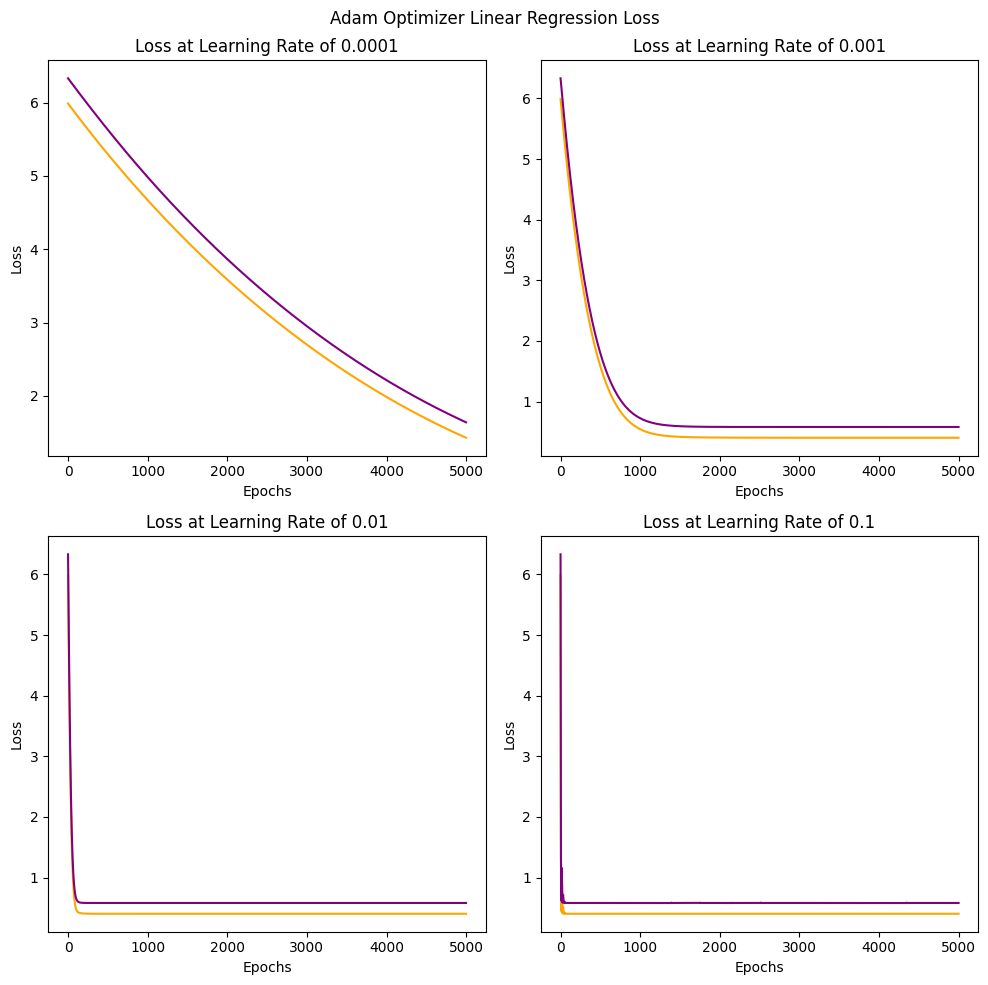

In [127]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(adam_train_loss4, color='orange')
plt.plot(adam_valid_loss4, color='purple')
plt.title('Loss at Learning Rate of 0.0001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(adam_train_loss3, color='orange')
plt.plot(adam_valid_loss3, color='purple')
plt.title('Loss at Learning Rate of 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(adam_train_loss2, color='orange')
plt.plot(adam_valid_loss2, color='purple')
plt.title('Loss at Learning Rate of 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(adam_train_loss1, color='orange')
plt.plot(adam_valid_loss1, color='purple')
plt.title('Loss at Learning Rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [128]:
# Create dataframes for each url
dfh = pd.read_csv(housing_url)

# Map string variables to binary values
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

dfh[variable_list] = dfh[variable_list].apply(binary_mapping)
dfh = dfh.drop('furnishingstatus', axis=1)

In [129]:
def lin_model2(t_x, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
  """
  Building linear model for the neural network

  Parameters:
  t_x : The input data
  thetas : Values for the thetas

  Returns:
  The output of the linear model
  """
  return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [130]:
def lin_train2(epochs, optimizer, params, t_x_train, t_x_valid, t_y_train, t_y_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model2(t_x_train, *params)
    train_loss = loss(t_p_train, t_y_train)

    t_p_valid = lin_model2(t_x_valid, *params)
    valid_loss = loss(t_p_valid, t_y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 1 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params, train_losses, valid_losses

In [131]:
# Get the data
y = dfh['price'].values
dfh2 = dfh.drop('price', axis=1)
x = dfh2.values

# Standardize input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Standardize output variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

t_x = torch.tensor(x_scaled)
t_y = torch.tensor(y_scaled)

# Creating training and validation sets
n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffle_index = torch.randperm(n_samples)
train_index = shuffle_index[:-n_val]
val_index = shuffle_index[-n_val:]

train_t_x = t_x[train_index]
train_t_y = t_y[train_index]

val_t_x = t_x[val_index]
val_t_y = t_y[val_index]

In [132]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)
print('Learning rate of 0.1\n')
model5, train_loss5, valid_loss5 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss5 = np.array([item.detach().item() for item in train_loss5])
sgd_valid_loss5 = np.array([item.detach().item() for item in valid_loss5])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.01)
print('Learning rate of 0.01\n')
model6, train_loss6, valid_loss6 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss6 = np.array([item.detach().item() for item in train_loss6])
sgd_valid_loss6 = np.array([item.detach().item() for item in valid_loss6])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.001)
print('Learning rate of 0.001\n')
model7, train_loss7, valid_loss7 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss7 = np.array([item.detach().item() for item in train_loss7])
sgd_valid_loss7 = np.array([item.detach().item() for item in valid_loss7])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model8, train_loss8, valid_loss8 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss8 = np.array([item.detach().item() for item in train_loss8])
sgd_valid_loss8 = np.array([item.detach().item() for item in valid_loss8])

Learning rate of 0.1

Epochs: 1, 	Training Loss: 17.323993, 	Validation Loss: 17.083909

Epochs: 2, 	Training Loss: 5.456755, 	Validation Loss: 5.706829

Epochs: 3, 	Training Loss: 2.063643, 	Validation Loss: 2.272302

Epochs: 4, 	Training Loss: 1.028476, 	Validation Loss: 1.142032

Epochs: 5, 	Training Loss: 0.672363, 	Validation Loss: 0.720434

Epochs: 6, 	Training Loss: 0.526082, 	Validation Loss: 0.538477

Epochs: 7, 	Training Loss: 0.453345, 	Validation Loss: 0.448901

Epochs: 8, 	Training Loss: 0.411413, 	Validation Loss: 0.400482

Epochs: 9, 	Training Loss: 0.384989, 	Validation Loss: 0.372840

Epochs: 10, 	Training Loss: 0.367529, 	Validation Loss: 0.356645

Epochs: 11, 	Training Loss: 0.355698, 	Validation Loss: 0.347094

Epochs: 12, 	Training Loss: 0.347560, 	Validation Loss: 0.341509

Epochs: 13, 	Training Loss: 0.341905, 	Validation Loss: 0.338321

Epochs: 14, 	Training Loss: 0.337945, 	Validation Loss: 0.336584

Epochs: 15, 	Training Loss: 0.335152, 	Validation Loss: 0.335

In [133]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.1)
print('Learning rate of 0.1\n')
model5, train_loss5, valid_loss5 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss5 = np.array([item.detach().item() for item in train_loss5])
adam_valid_loss5 = np.array([item.detach().item() for item in valid_loss5])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.01)
print('Learning rate of 0.01\n')
model6, train_loss6, valid_loss6 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss6 = np.array([item.detach().item() for item in train_loss6])
adam_valid_loss6 = np.array([item.detach().item() for item in valid_loss6])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.001)
print('Learning rate of 0.001\n')
model7, train_loss7, valid_loss7 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss7 = np.array([item.detach().item() for item in train_loss7])
adam_valid_loss7 = np.array([item.detach().item() for item in valid_loss7])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model8, train_loss8, valid_loss8 = lin_train2(200, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss8 = np.array([item.detach().item() for item in train_loss8])
adam_valid_loss8 = np.array([item.detach().item() for item in valid_loss8])


Learning rate of 0.1

Epochs: 1, 	Training Loss: 17.323993, 	Validation Loss: 17.083909

Epochs: 2, 	Training Loss: 13.519783, 	Validation Loss: 13.432193

Epochs: 3, 	Training Loss: 10.227429, 	Validation Loss: 10.222432

Epochs: 4, 	Training Loss: 7.431553, 	Validation Loss: 7.447659

Epochs: 5, 	Training Loss: 5.133232, 	Validation Loss: 5.145524

Epochs: 6, 	Training Loss: 3.326847, 	Validation Loss: 3.326303

Epochs: 7, 	Training Loss: 1.992501, 	Validation Loss: 1.977726

Epochs: 8, 	Training Loss: 1.094175, 	Validation Loss: 1.066442

Epochs: 9, 	Training Loss: 0.581370, 	Validation Loss: 0.540349

Epochs: 10, 	Training Loss: 0.391685, 	Validation Loss: 0.334621

Epochs: 11, 	Training Loss: 0.452091, 	Validation Loss: 0.375901

Epochs: 12, 	Training Loss: 0.682139, 	Validation Loss: 0.585845

Epochs: 13, 	Training Loss: 1.000397, 	Validation Loss: 0.886702

Epochs: 14, 	Training Loss: 1.332868, 	Validation Loss: 1.208316

Epochs: 15, 	Training Loss: 1.620844, 	Validation Loss: 1

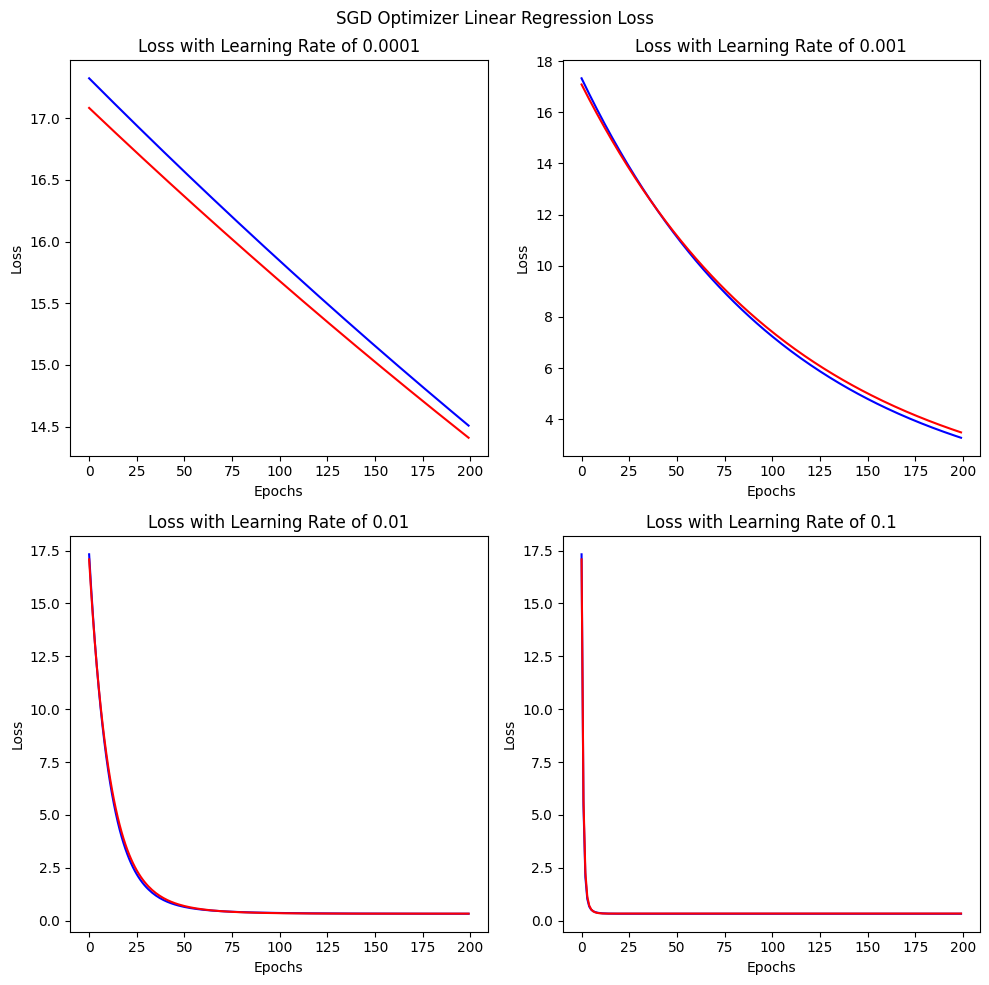

In [134]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(sgd_train_loss8, color='blue')
plt.plot(sgd_valid_loss8, color='red')
plt.title('Loss with Learning Rate of 0.0001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(sgd_train_loss7, color='blue')
plt.plot(sgd_valid_loss7, color='red')
plt.title('Loss with Learning Rate of 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(sgd_train_loss6, color='blue')
plt.plot(sgd_valid_loss6, color='red')
plt.title('Loss with Learning Rate of 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(sgd_train_loss5, color='blue')
plt.plot(sgd_valid_loss5, color='red')
plt.title('Loss with Learning Rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

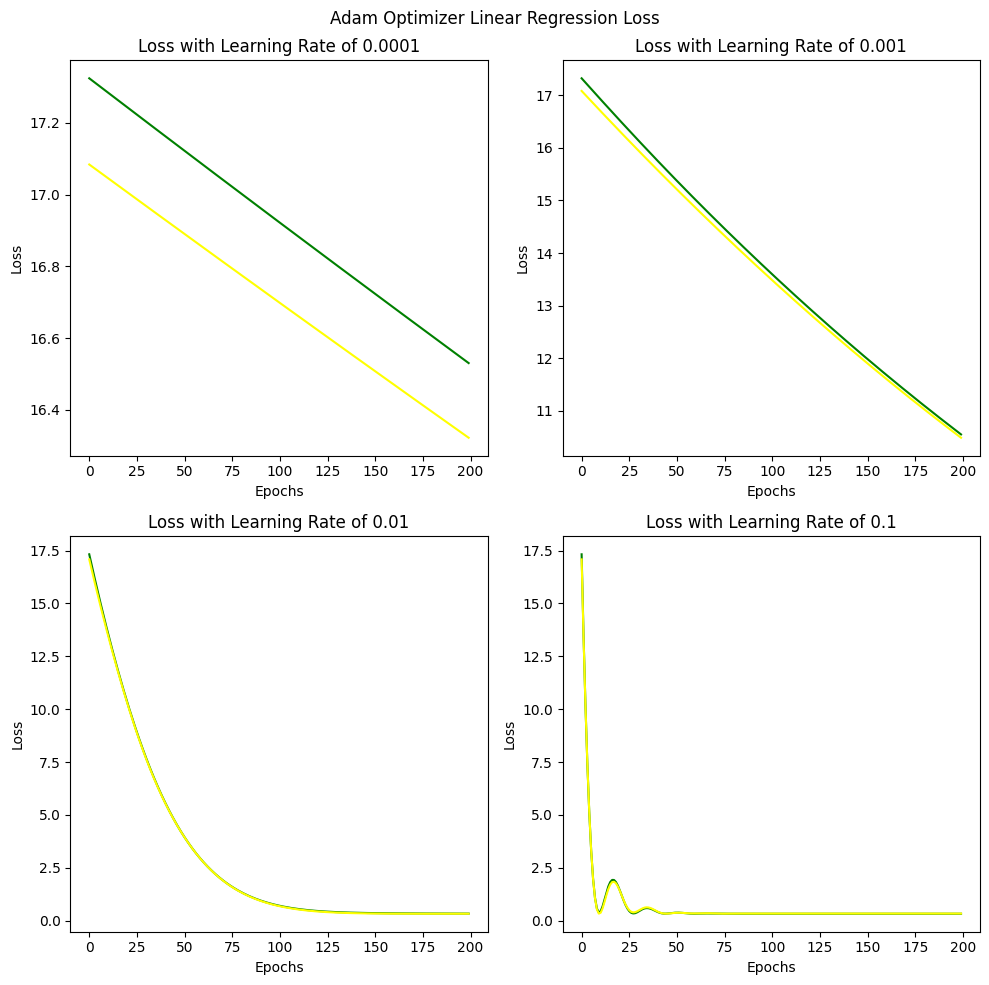

In [135]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(adam_train_loss8, color='green')
plt.plot(adam_valid_loss8, color='yellow')
plt.title('Loss with Learning Rate of 0.0001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(adam_train_loss7, color='green')
plt.plot(adam_valid_loss7, color='yellow')
plt.title('Loss with Learning Rate of 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(adam_train_loss6, color='green')
plt.plot(adam_valid_loss6, color='yellow')
plt.title('Loss with Learning Rate of 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(adam_train_loss5, color='green')
plt.plot(adam_valid_loss5, color='yellow')
plt.title('Loss with Learning Rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [136]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

### Training Function for `nn.Module` Models

We need a training function that can handle models defined using `nn.Module`. This function will utilize `nn.MSELoss` as the loss criterion.

In [137]:
def nn_train_module(epochs, optimizer, model, criterion, t_x_train, t_x_valid, t_y_train, t_y_valid):
    train_losses = []
    valid_losses = []

    for epoch in range(1, epochs + 1):
        model.train() # Set model to training mode
        t_p_train = model(t_x_train.double())
        train_loss = criterion(t_p_train.squeeze(), t_y_train.double())

        model.eval() # Set model to evaluation mode
        with torch.no_grad(): # Disable gradient calculations for validation
            t_p_valid = model(t_x_valid.double())
            valid_loss = criterion(t_p_valid.squeeze(), t_y_valid.double())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        if epoch % 1 == 0:
            print(f'Epochs: {epoch}, \tTraining Loss: {train_loss.item():.6f}, \tValidation Loss: {valid_loss.item():.6f}\n')

    return model, train_losses, valid_losses

In [138]:
input_size = train_t_x.shape[1]
hidden_size1 = 8
hidden_size2 = 8
output_size = 1

criterion = nn.MSELoss()

learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 200

sgd_nn_train_losses = {}
sgd_nn_valid_losses = {}
adam_nn_train_losses = {}
adam_nn_valid_losses = {}

print('SGD Optimizers for Neural Network:')
for rate in learning_rates:
    model_sgd = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
    model_sgd.double()
    optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=rate)
    print(f'Learning rate of {rate}')
    _, train_loss, valid_loss = nn_train_module(epochs, optimizer_sgd, model_sgd, criterion, train_t_x, val_t_x, train_t_y, val_t_y)
    sgd_nn_train_losses[rate] = np.array([item.detach().item() for item in train_loss])
    sgd_nn_valid_losses[rate] = np.array([item.detach().item() for item in valid_loss])

print('\nAdam Optimizers for Neural Network:')
for rate in learning_rates:
    model_adam = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
    model_adam.double()
    optimizer_adam = optim.Adam(model_adam.parameters(), lr=rate)
    print(f'Learning rate of {rate}')
    _, train_loss, valid_loss = nn_train_module(epochs, optimizer_adam, model_adam, criterion, train_t_x, val_t_x, train_t_y, val_t_y)
    adam_nn_train_losses[rate] = np.array([item.detach().item() for item in train_loss])
    adam_nn_valid_losses[rate] = np.array([item.detach().item() for item in valid_loss])

SGD Optimizers for Neural Network:
Learning rate of 0.1
Epochs: 1, 	Training Loss: 1.079260, 	Validation Loss: 0.946855

Epochs: 2, 	Training Loss: 1.050120, 	Validation Loss: 0.914072

Epochs: 3, 	Training Loss: 1.027972, 	Validation Loss: 0.889559

Epochs: 4, 	Training Loss: 1.009904, 	Validation Loss: 0.870399

Epochs: 5, 	Training Loss: 0.994172, 	Validation Loss: 0.854176

Epochs: 6, 	Training Loss: 0.979461, 	Validation Loss: 0.839520

Epochs: 7, 	Training Loss: 0.965083, 	Validation Loss: 0.825609

Epochs: 8, 	Training Loss: 0.950974, 	Validation Loss: 0.811983

Epochs: 9, 	Training Loss: 0.936075, 	Validation Loss: 0.798269

Epochs: 10, 	Training Loss: 0.919900, 	Validation Loss: 0.784305

Epochs: 11, 	Training Loss: 0.901951, 	Validation Loss: 0.769069

Epochs: 12, 	Training Loss: 0.882707, 	Validation Loss: 0.752267

Epochs: 13, 	Training Loss: 0.863412, 	Validation Loss: 0.735329

Epochs: 14, 	Training Loss: 0.842580, 	Validation Loss: 0.717436

Epochs: 15, 	Training Loss: 0

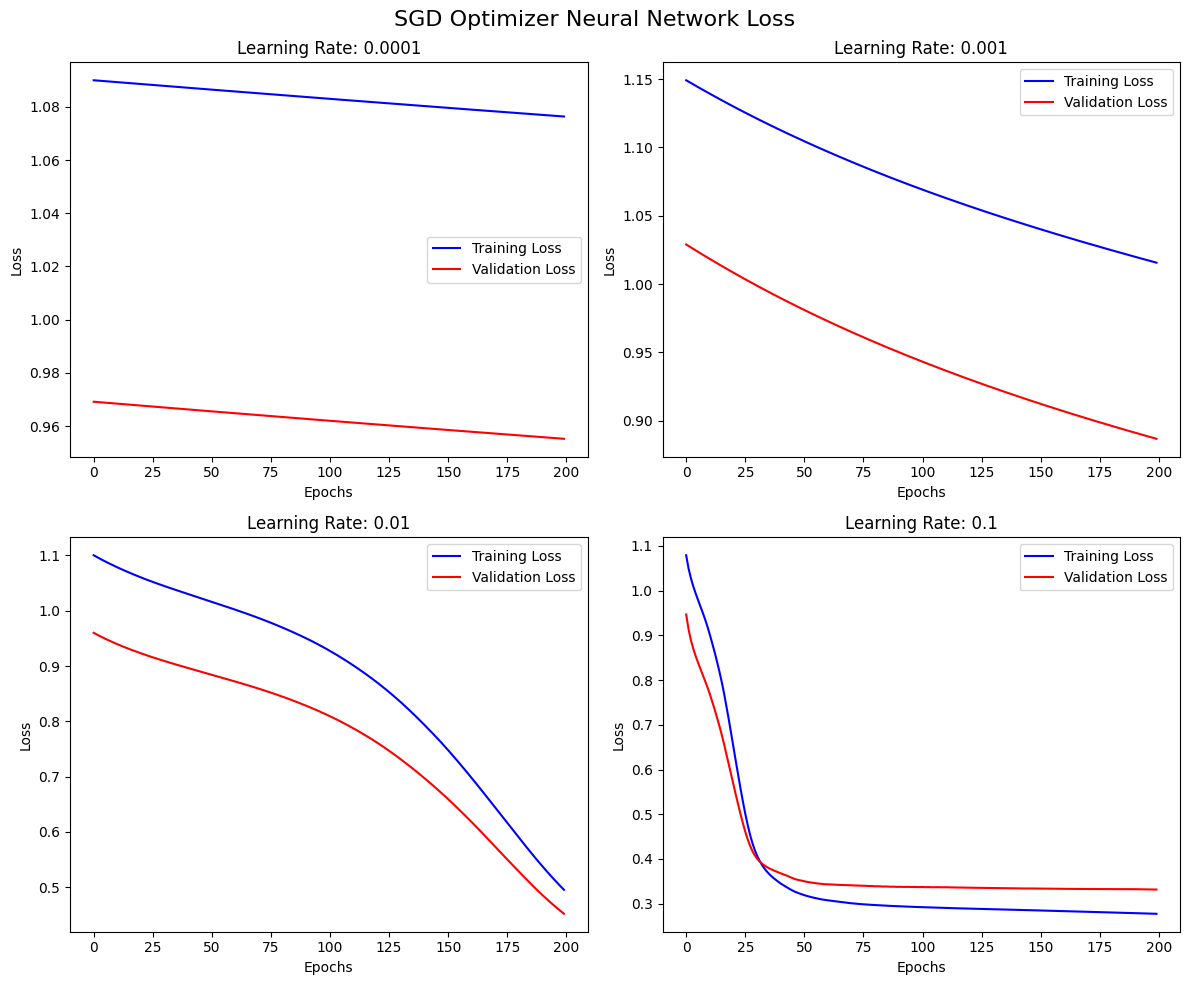

In [139]:
plt.figure(figsize=(12, 10))
plt.suptitle('SGD Optimizer Neural Network Loss', fontsize=16)

rates = sorted(sgd_nn_train_losses.keys())

for i, rate in enumerate(rates):
    plt.subplot(2, 2, i + 1)
    plt.plot(sgd_nn_train_losses[rate], color='blue', label='Training Loss')
    plt.plot(sgd_nn_valid_losses[rate], color='red', label='Validation Loss')
    plt.title(f'Learning Rate: {rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

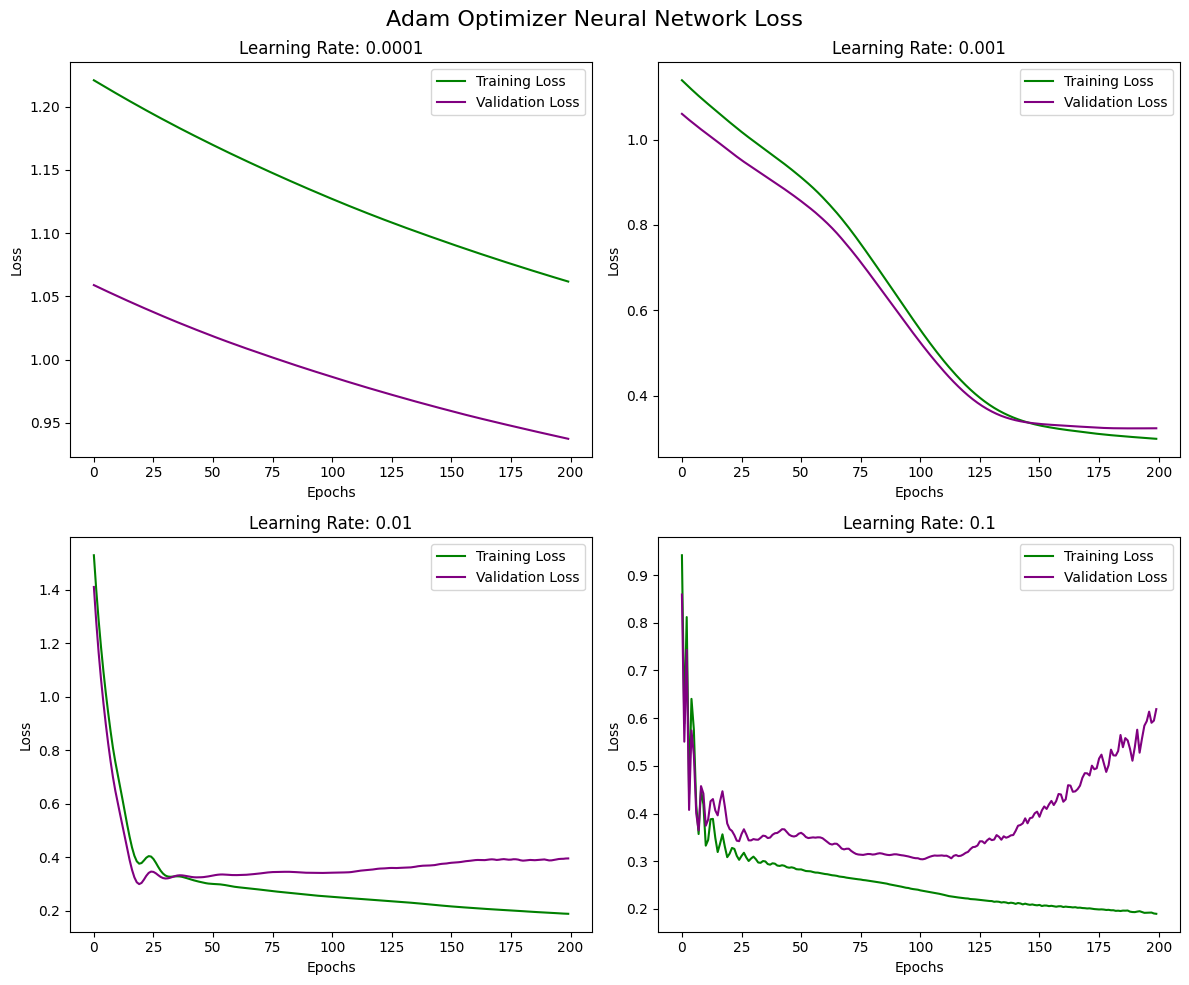

In [140]:
plt.figure(figsize=(12, 10))
plt.suptitle('Adam Optimizer Neural Network Loss', fontsize=16)

rates = sorted(adam_nn_train_losses.keys())

for i, rate in enumerate(rates):
    plt.subplot(2, 2, i + 1)
    plt.plot(adam_nn_train_losses[rate], color='green', label='Training Loss')
    plt.plot(adam_nn_valid_losses[rate], color='purple', label='Validation Loss')
    plt.title(f'Learning Rate: {rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()